In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, sqrt, exp, factorial

## Introduction

This page follows page 290 to 297 in *Physical Chemistry, 8th Ed.* by Peter Atkins and Julio de Paula. This section of the text deals with quantum harmonic oscillators. Here, I will define a class that models the quantum harmonic oscillator and test it on examples in the text.

The following equations describe its energy levels:

$$ \omega = \sqrt{\frac{k}{m}} $$

$$ E_{\nu} = \Bigl(\nu + \frac{1}{2}\Bigr) \hbar \omega $$

$$ \nu = 0, 1, 2, \dots $$

The following equations describe its wavefunction:

$$ \alpha = \Biggl(\frac{\hbar^2}{mk}\Biggr)^{1/4} $$

$$ \gamma = \frac{x}{\alpha} $$

$$ \psi_{\nu}(x) = N_{\nu} H_{\nu}(\gamma) e^{-\gamma^{2}/2} $$

where \\(H_{\nu}(\gamma)\\) is a Hermite polynomial. The form of the first six Hermite polynomials are on page 293 of the text and are also implemented in the `QuantumHarmonicOscillator` class shown in the Python source code section below. Here is a sampling of the first three:

$$ H_0(\gamma) = 1 $$

$$ H_1(\gamma) = 2 \gamma $$

$$ H_2(\gamma) = 4 \gamma^2 - 2 $$

Example 9.3 on page 294 demonstrates the derivation of the normalization constant \\(N_{\nu}\\), which results in the following expression for the normalization constant:

$$ N_{\nu} = \sqrt{\frac{1}{\alpha \pi^{1/2} 2^{\nu} \nu!}} $$

In [2]:
class QuantumHarmonicOscillator:
    """
    This models a harmonic oscillator. Parameters used throughout the methods
    are:
    
    nu: The level of the harmonic oscillator
    k: The force constant
    m: The mass
    
    The nomenclature of variable names follows Atkins and de Paula Physical
    Chemistry 8th ed.
    """
    
    def __init__(self, mass, k):
        """
        Setup the values used by all methods in this model.
        
        Parameters
        ----------
        mass: float
            The reduced mass of the system, in kg
        
        k: float
            The force constant, in N/m
        """
        self.hbar = 1.054571817e-34
        self.k = k
        self.mass = mass
        self.omega = sqrt(k / mass)
    
    def hermite(self, nu, gamma):
        """
        Returns the value of the nu-th (nth) Hermite polynomial evaluated on gamma
        
        The nu and gamma notation follows Atkins' Physical Chemistry 8th ed.
        
        Parameters
        ----------
        nu: int
            The nu-th (nth) Hermite polynomial
            
        gamma: float
            The value to calculate with the Hermite polynomial
            
        Returns
        -------
        float
            The value of the nu-th Hermite polynomial evaluated with gamma.
            
        Raises
        ------
        Exception
            Raises an exception if the nth Hermite polynomial is not
            supported.
        """
        if nu == 0:
            return 1
        elif nu == 1:
            return 2 * gamma
        elif nu == 2:
            return 4 * gamma ** 2 - 2
        elif nu == 3:
            return 8 * gamma ** 3 - 12 * gamma
        elif nu == 4:
            return 16 * gamma ** 4 - 48 * gamma ** 2 + 12
        elif nu == 5:
            return 32 * gamma ** 5 - 160 * gamma ** 3 + 120 * gamma
        elif nu == 6:
            return 64 * gamma ** 6 - 480 * gamma ** 4 + 720 * gamma ** 2 - 120
        else:
            raise Exception(f'Hermite polynomial {n} is not supported')
            
    def max_nu(self):
        """
        Returns
        -------
        int
            The maximum nu value for the instance.
        """
        return 6
    
    def energy(self, nu):
        """
        Calculate the energy at the given level nu of the system
        
        Parameters
        ----------
        nu: int
            The quantum number nu for the energy level of this system
            
        Returns
        -------
        float
            Energy of the system in Joules.
        """
        return (nu + 0.5) * self.hbar * self.omega
    
    def energy_separation(self):
        """
        Returns
        -------
        float
            The energy difference between adjacent energy levels in Joules.
        """
        return self.hbar * self.omega
    
    def wavefunction(self, nu, x):
        """
        Returns the value of the wavefunction at energy level nu
        at coordinate x.
        
        Parameters
        ----------
        nu: float
            Energy level of the system.
            
        x: float
            x coordinate of the particle in m.
            
        Returns
        -------
        float
            Value of the wavefunction nu at x.
        """
        alpha = (self.hbar ** 2 / self.mass / self.k) ** 0.25
        gamma = x / alpha
        normalization = sqrt(1 / (alpha * sqrt(pi) * 2 ** nu * factorial(nu)))
        gaussian = exp((-gamma ** 2) / 2)
        hermite = self.hermite(nu, gamma)
        return normalization * hermite * gaussian
    
    def wavefunction_across_range(self, nu, x_min, x_max, points=100):
        """
        Calculates the wavefunction across a range.
        
        Parameters
        ----------
        nu: int
            The quantum number of the system.
            
        x_min: float
            The minimum x value to calculate.
            
        x_max: float
            The maximum x value to calculate.
            
        points: int
            The number of points across the range
            
        Returns
        -------
        np.array, list
            The first array are the x coordinates, the second list are the
            float values of the wavefunction.
        """
        xs = np.linspace(x_min, x_max, points)
        ys = [self.wavefunction(nu, x) for x in xs]
        return xs, ys
    
    def prob_density(self, nu, x_min, x_max, points=100):
        """
        Returns the probability density between x_min and x_max for a given
        number of points at energy level nu.
        
        Parameters
        ----------
        nu: int
            Quantum number of the system.
            
        x_min: float
            Minimum of length being calculated. Probably negative. Units are
            meters.
            
        x_max: float
            Maximum of length being calculated. Probably positive. Units are
            meters.
            
        points: int
            The number of points to compute the probability density for
            
        Returns
        -------
        np.array, list
            The first array is the list of x coordinates. The list are the
            corresponding values of the probability density.
        """
        xs = np.linspace(x_min, x_max, points)
        ys = [self.wavefunction(nu, x) ** 2 for x in xs]
        return xs, ys
    
    def integrate_prob_density_between_limits(self, nu, x_min, x_max):
        """
        As a way of testing the methods in this class, provide a way to
        integrate across the wavefunction squared between limits.
        
        Parameters
        ----------
        nu: int
            Quantum number of the system.
            
        x_min: float
            lower bound of integration
            
        x_max: float
            upper bound of integration
        """
        def integrand(x):
            return self.wavefunction(nu, x) ** 2
        result, _ = quad(integrand, x_min, x_max)
        return result

## Test the class with <sup>1</sup>H<sup>35</sup>Cl Properties

The <sup>1</sup>H<sup>35</sup>Cl molecule has a bond with the following physical properties (the mass is of the proton in Hydrogen).

$$ k = 516.3 N/m $$

$$ m = 1.7 \times 10^{-27} kg $$


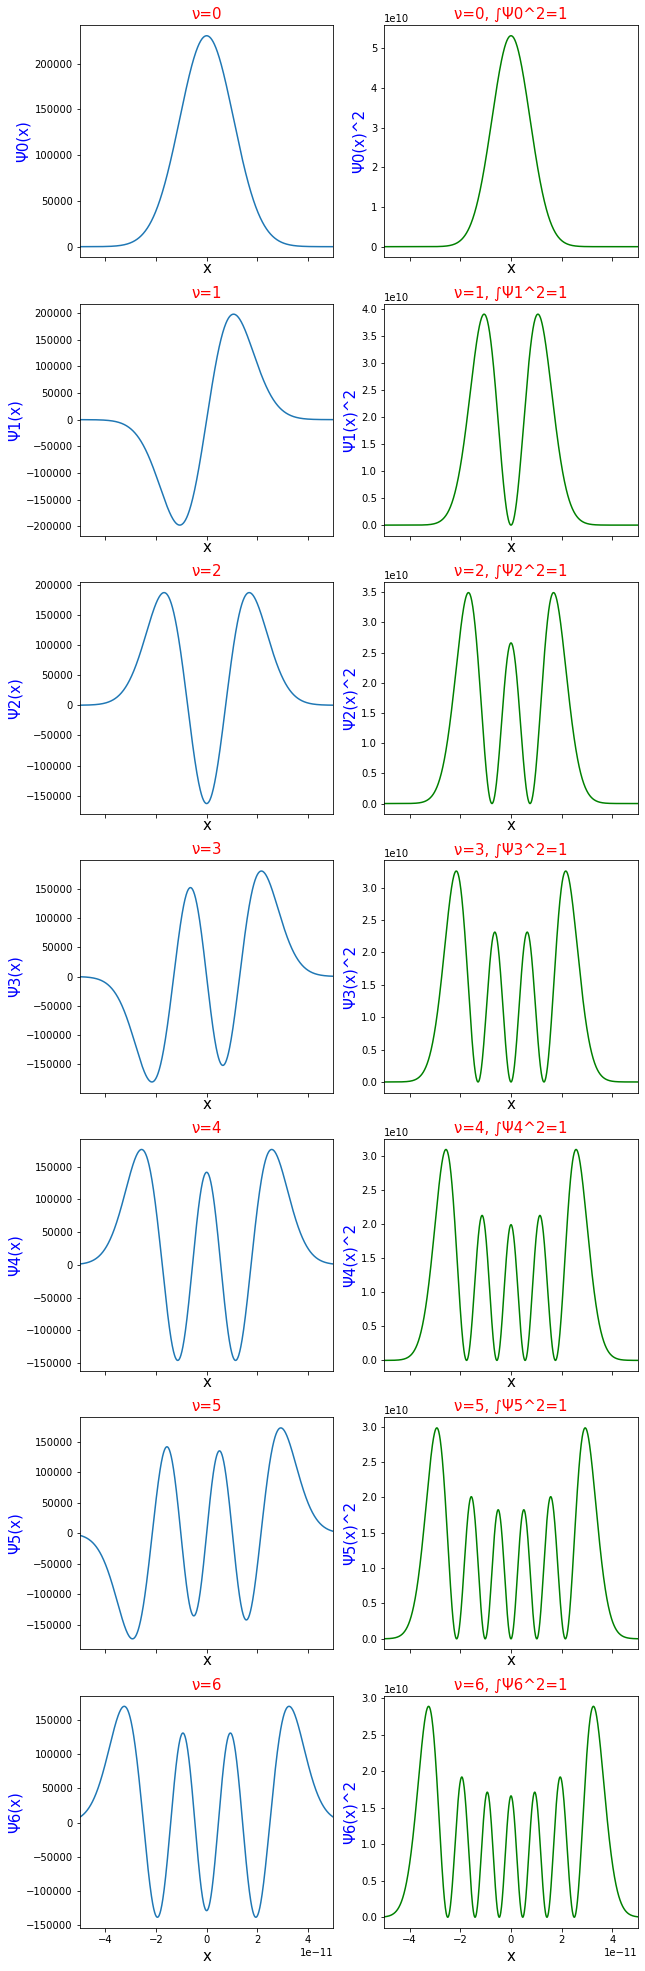

In [3]:
k = 516.3
mass = 1.7e-27
x_min = -0.5e-10
x_max = 0.5e-10
points = 1000
qho = QuantumHarmonicOscillator(k=k, mass=mass)
nus = range(qho.max_nu() + 1)
fig, axs = plt.subplots(nrows=len(nus), ncols=2, figsize=(10, len(nus) * 5), sharex=True)
for idx, nu in enumerate(nus):
    xs_wavefunction, ys_wavefunction = qho.wavefunction_across_range(nu, x_min, x_max, points)
    xs_prob_density, ys_prob_density = qho.prob_density(nu, x_min, x_max, points)
    integrated = qho.integrate_prob_density_between_limits(nu, x_min, x_max)
    axs[nu, 0].set_title(f'ν={nu}', size=15, color='r')
    axs[nu, 0].set_ylabel(f'Ψ{nu}(x)', size=15, color='b')
    axs[nu, 0].set_xlabel('x', size=15)
    axs[nu, 0].set_xlim(x_min, x_max)
    axs[nu, 1].set_title(f'ν={nu}, ∫Ψ{nu}^2={round(integrated)}', size=15, color='r')
    axs[nu, 1].set_ylabel(f'Ψ{nu}(x)^2', size=15, color='b')
    axs[nu, 1].set_xlabel('x', size=15)
    axs[nu, 1].set_xlim(x_min, x_max)
    axs[nu, 0].plot(xs_wavefunction, ys_wavefunction)
    axs[nu, 1].plot(xs_prob_density, ys_prob_density, color='g')

In the plots of Figure 1, there are two columns. The left column is a plot of wavefunctions at different nu levels, each with a title indicating the level of the plot. The right column has plots of the squares of the wavefunctions. Like the left column plots, the titles of these plots contain the nu value that created them. In addition, the titles include an integral in their titles. These integrals all have a value of one, meaning each square of the wavefunction displays the probability throughout the entire space of wavefunction.

## Testing the energy level calculation from Illustration 9.3

Using the <sup>1</sup>H<sup>35</sup>Cl specifications from above, I will calculate the zero point energy and the energy and the senergy separation following Atkins and de Paula, Illustration 9.3.

$$ k = 516.3 N/m $$

$$ m = 1.7 \times 10^{-27} kg $$

Note: I am using k=500 N/m to match the approximation used in Illustration 9.3 of the text.


In [4]:
k = 500
mass = 1.7e-27
mol = 6.022e23
qho = QuantumHarmonicOscillator(k=k, mass=mass)
energy_sep_kj_mol = qho.energy_separation() * mol / 1000  # Convert to kJ/mol
print(f'energy sepration between ν and ν+1, {energy_sep_kj_mol} kJ/mol')
zero_point_kj_mol = qho.energy(nu=0) * mol / 1000
print(f'zero-point energy {zero_point_kj_mol} kJ/mol')
first_excitation_thz = (qho.energy(nu=1) - qho.energy(nu=0)) / 6.626e-34 / 1e12
print(f'First excitation energy {first_excitation_thz} THz')

energy sepration between ν and ν+1, 34.44113487055476 kJ/mol
zero-point energy 17.22056743527738 kJ/mol
First excitation energy 86.31480043180733 THz


From the answers given in the book, this gives my model the following differences.

In [5]:
delta_energy_sep = (round(energy_sep_kj_mol) / 34.0 - 1) * 100
print(f'delta energy separation {delta_energy_sep}%')
delta_zero_point = (round(zero_point_kj_mol) / 15.0 - 1) * 100
print(f'delta zero point energy {delta_zero_point}%')
delta_first_excitation = (round(first_excitation_thz) / 86.0 - 1) * 100
print(f'delta first excitation {delta_first_excitation}%')

delta energy separation 0.0%
delta zero point energy 13.33333333333333%
delta first excitation 0.0%
